# News Articles Categorisation


The steps to build the model are

- Data Exploration
- Text Processing (Cleaning)
- Feature Extraction
- Modelling
- Use the Model

In this notebook, we will be documenting our project codes for our industry sponsor, Food Security Exchange (FSX). This will be written in python, with supplementary comments at each step to ensure that users can both comprehend and trust the results and output generated by the algorithms.

Our project mines trigger events related news articles from various sources, before classifying them according to predefined supply chain disruption categories using both a rule-based and ML-based approach. Following this, a predictive risk score is assigned to every article.

# Possible Reference


- https://www.analyticsvidhya.com/blog/2021/08/malawi-news-classification-an-nlp-project/

# Importing Libraries

In [2]:
import nltk

# nltk.download()

In [3]:
# Import libraries

import pandas as pd
import re 

import nltk 
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost 
from sklearn.metrics  import classification_report
from sklearn import metrics
import time



C:\Users\User\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Combining multiple excel files into one dataframe


In [6]:
import os
import pandas as pd
cwd = os.path.abspath('CSV Data for Classifier') 
files = os.listdir(cwd) 

In [7]:
cwd

'C:\\Users\\User\\Desktop\\FYP\\FSX\\FYP Deliverables\\Working Files and Notebooks\\CSV Data for Classifier'

In [8]:
files

['avalanche_straitstimes.csv',
 'contamination_straitstimes.csv',
 'cyberattack_straitstimes.csv',
 'cyclone_straitstimes.csv',
 'dengue_straitstimes.csv',
 'drought_straitstimes.csv',
 'earthquake_straitstimes.csv',
 'ebola_straitstimes.csv',
 'economic crisis_straitstimes.csv',
 'floods_straitstimes.csv',
 'heat stress_straitstimes.csv',
 'Influenza_straitstimes.csv',
 'limnic eruption_straitstimes.csv',
 'nuclear_straitstimes.csv',
 'oil spills_straitstimes.csv',
 'pandemic_straitstimes.csv',
 'SarS_straitstimes.csv',
 'sinkhole_straitstimes.csv',
 'terror_straitstimes.csv',
 'tradedispute_straitstimes.csv',
 'tsunami_straitstimes.csv',
 'Unsafe_straitstimes.csv',
 'volcanic eruption_straitstimes.csv',
 'war_straitstimes.csv']

In [9]:
df = pd.DataFrame()
for file in files:
     if file.endswith('.csv'):
         df = df.append(pd.read_csv(cwd+"/"+file), ignore_index=True) 
df.head()

<ipython-input-9-c499f365edd9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(cwd+"/"+file), ignore_index=True)
<ipython-input-9-c499f365edd9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(cwd+"/"+file), ignore_index=True)
<ipython-input-9-c499f365edd9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(cwd+"/"+file), ignore_index=True)
<ipython-input-9-c499f365edd9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(cwd+"/"+file), ignore_index=True)
<ipython-input-9-c499f365edd9>:4: FutureWarning: The frame.append method is depr

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event


In [10]:
df.shape

(13747, 9)

In [11]:
df['new_class_name'].value_counts()

Acute climatological event (droughts)       1743
idiosyncratic                               1320
Acute climatological event (flood)          1256
geophysical event                           1174
cyberattack                                 1117
Terrorism                                   1050
Military Conflicts                          1022
Economic Crisis                             1018
pandemic                                    1000
Acute climatological event (cyclone)         887
Trade Dispute                                809
Man-Made Disaster                            801
Acute climatological event (heat stress)     550
Name: new_class_name, dtype: int64

# Data Exploration

In [12]:
category = list(df['new_class_name'].unique())
category

['geophysical event',
 'idiosyncratic',
 'cyberattack',
 'Acute climatological event (cyclone)',
 'pandemic',
 'Acute climatological event (droughts)',
 'Economic Crisis',
 'Acute climatological event (flood)',
 'Acute climatological event (heat stress)',
 'Man-Made Disaster',
 'Terrorism',
 'Trade Dispute',
 'Military Conflicts']

In [13]:
filtered_df = df[df['new_class_name'] == 'cyberattack']

In [14]:
filtered_df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name
856,0,22-Feb,KYIV (BLOOMBERG),Cyber attack to hit Ukraine worst of its kind ...,https://www.straitstimes.com/world/europe/cybe...,KYIV (BLOOMBERG) - A cyber attack aimed at par...,"russia, cyber, services, history, ukraines, we...",cyberattack,cyberattack
857,1,22-Feb,WASHINGTON (REUTERS),"US, UK: Russia responsible for cyber attack ag...",https://www.straitstimes.com/world/europe/us-u...,US deputy national security adviser Anne Neube...,"russia, cyber, russias, military, attacks, uk,...",cyberattack,cyberattack
858,2,22-Feb,KYIV/MOSCOW/WASHINGTON (REUTERS),Ukraine hit by cyber attack as US questions Ru...,https://www.straitstimes.com/world/europe/ukra...,KYIV/MOSCOW/WASHINGTON (REUTERS) - Kyiv appear...,"russia, cyber, ministry, russian, suggested, b...",cyberattack,cyberattack
859,3,22-Feb,UNITED NATIONS (REUTERS),"North Korea grows nuclear, missiles programmes...",https://www.straitstimes.com/asia/east-asia/no...,The annual report by independent sanctions mon...,"korea, cyber, attacks, continued, programmes, ...",cyberattack,cyberattack
860,4,22-Feb,TOKYO (REUTERS),Japan eyes tighter curbs to counter cyber attacks,https://www.straitstimes.com/tech/tech-news/ja...,TOKYO (REUTERS) - Japan will consider imposing...,"cyber, proposal, economic, companies, attacks,...",cyberattack,cyberattack


# Text Preprocessing

- One way to improve on this could be to remove "said" or irrelevant words to clean the text more explicity

In [15]:
def preprocess(text):
    
    """
    Function: split text into words and return the root form of the words
    Args:
      text(str): the article
    Return:
      lem(list of str): a list of the root form of the article words
    """
        
    # Normalize text
    text = re.sub(r"[^a-zA-Z]", " ", str(text).lower())
    
    # Tokenize text
    token = word_tokenize(text)
    
    # Remove stop words
    stop = stopwords.words("english")
    new_stop_words_list = ['said', 'us', 'also', 'mr']
    stop.extend(new_stop_words_list)
    words = [t for t in token if t not in stop]
    
    # Lemmatization
    lem = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    return lem

In [16]:
df["Preprocessed_Text"] = df['content summary'].apply(lambda x: preprocess(x))
df.head(10)

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"[mumbai, reuters, himalayan, avalanche, killed..."
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"[zurich, reuters, one, person, killed, four, o..."
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"[vienna, reuters, avalanche, area, austria, bo..."
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"[new, delhi, reuters, himalayan, avalanche, tr..."
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"[salt, lake, city, nytimes, four, back, countr..."
5,5,Apr-21,NEW DELHI (XINHUA),8 killed after glacial burst triggers avalanch...,https://www.straitstimes.com/asia/south-asia/8...,"According to officials, 384 others, mostly bel...","avalanche, officials, bro, glacial, uttarakhan...",natural calamities,geophysical event,"[according, official, others, mostly, belongin..."
6,6,Jan-21,VIENNA (REUTERS),Dogs' barking prompts owners' rescue from Swis...,https://www.straitstimes.com/world/europe/dogs...,VIENNA (REUTERS) - Two people caught in an ava...,"dogs, avalanche, buried, snowshoers, group, wi...",natural calamities,geophysical event,"[vienna, reuters, two, people, caught, avalanc..."
7,7,Jan-21,FRANCE (AFP),'Miracle' escape for man trapped in Alps avala...,https://www.straitstimes.com/world/europe/mira...,FRANCE (AFP) - A man out walking with his fami...,"minutes, avalanche, local, escape, snow, rescu...",natural calamities,geophysical event,"[france, afp, man, walking, family, french, al..."
8,8,Jan-20,"MUZAFFARABAD, PAKISTAN (REUTERS)",Girl buried under Pakistan avalanche for 18 ho...,https://www.straitstimes.com/asia/south-asia/g...,"MUZAFFARABAD, PAKISTAN (REUTERS) - A 12-year-o...","buried, avalanche, waited, pakistan, village, ...",natural calamities,geophysical event,"[muzaffarabad, pakistan, reuters, year, old, g..."
9,9,Dec-19,VIENNA (REUTERS),"Rescuers comb Austrian, Swiss avalanches in ca...",https://www.straitstimes.com/world/europe/resc...,VIENNA (REUTERS) - Rescuers hunted for possibl...,"avalanche, large, snow, warning, swiss, victim...",natural calamities,geophysical event,"[vienna, reuters, rescuer, hunted, possible, v..."


# Text Exploration

In [17]:
def find_common_words(df, category):
        
    """
    Function: find the most frequent words in the category and return the them
    Args:
      df(dataframe): the dataframe of articles
      category(str): the category name
    Return:
      the most frequant words in the category
    """
        
    # Create dataframes for the category
    cat_df = df[df["new_class_name"]==category]
    
    # Initialize words list for the category
    words = [word for tokens in cat_df["Preprocessed_Text"] for word in tokens]
    
    # Count words frequency
    words_counter = Counter(words)
 
    return words_counter.most_common(10)

In [18]:
print("Most common words in each category")
for c in category:
    print(c, " News")
    print(find_common_words(df, c))
    print()

Most common words in each category
geophysical event  News
[('people', 677), ('volcano', 580), ('eruption', 448), ('tsunami', 397), ('year', 391), ('earthquake', 386), ('island', 377), ('quake', 353), ('new', 336), ('one', 325)]

idiosyncratic  News
[('year', 579), ('singapore', 450), ('food', 376), ('one', 368), ('safety', 356), ('people', 346), ('last', 328), ('new', 311), ('health', 299), ('unsafe', 283)]

cyberattack  News
[('cyber', 2317), ('attack', 1604), ('security', 1483), ('singapore', 771), ('data', 567), ('system', 527), ('government', 471), ('agency', 419), ('hacker', 386), ('year', 370)]

Acute climatological event (cyclone)  News
[('cyclone', 747), ('people', 619), ('storm', 603), ('climate', 446), ('year', 384), ('state', 365), ('island', 329), ('wind', 303), ('hit', 295), ('tropical', 293)]

pandemic  News
[('dengue', 955), ('year', 780), ('case', 767), ('singapore', 583), ('health', 523), ('covid', 514), ('virus', 484), ('people', 477), ('pandemic', 445), ('last', 362

In [19]:
df['Preprocessed_Text2'] = df['Preprocessed_Text'].apply(' '.join)
df.head()

,Unnamed: 0,date,location,news title,news source(url),content summary,keywords,class_name,new_class_name,Preprocessed_Text,Preprocessed_Text2
0,0,Feb-22,MUMBAI (REUTERS),Himalayan avalanche kills seven Indian soldier...,https://www.straitstimes.com/asia/himalayan-av...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"kills, avalanche, defence, kameng, china, sold...",natural calamities,geophysical event,"[mumbai, reuters, himalayan, avalanche, killed...",mumbai reuters himalayan avalanche killed seve...
1,1,Feb-22,ZURICH (REUTERS),Eight killed in two days after third deadly av...,https://www.straitstimes.com/world/europe/eigh...,ZURICH (REUTERS) - One person was killed and f...,"person, avalanche, tyrol, killed, days, skiers...",natural calamities,geophysical event,"[zurich, reuters, one, person, killed, four, o...",zurich reuters one person killed four others i...
2,2,Feb-22,VIENNA (REUTERS),Avalanche in Austria near Swiss border kills five,https://www.straitstimes.com/world/europe/aval...,VIENNA (REUTERS) - An avalanche in an area of ...,"kills, avalanche, person, services, supervisor...",natural calamities,geophysical event,"[vienna, reuters, avalanche, area, austria, bo...",vienna reuters avalanche area austria borderin...
3,3,Feb-22,NEW DELHI (REUTERS),Himalayan avalanche traps Indian Army patrol t...,https://www.straitstimes.com/asia/south-asia/h...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"arunachal, avalanche, army, defence, team, chi...",natural calamities,geophysical event,"[new, delhi, reuters, himalayan, avalanche, tr...",new delhi reuters himalayan avalanche trapped ...
4,4,Feb-21,SALT LAKE CITY (NYTIMES),"4 skiers killed in avalanche in Utah, official...",https://www.straitstimes.com/world/united-stat...,SALT LAKE CITY (NYTIMES) - Four back-country s...,"avalanche, states, killed, skiers, saidthe, sa...",natural calamities,geophysical event,"[salt, lake, city, nytimes, four, back, countr...",salt lake city nytimes four back country skier...


In [20]:
X = df['Preprocessed_Text2']
y = df['new_class_name']

# Feature Extraction

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
tf_vec = TfidfVectorizer()
train_features = tf_vec.fit(X_train)
train_features = tf_vec.transform(X_train)
test_features = tf_vec.transform(X_test)

# Modelling

In [23]:
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of the model training time and classification report
    """
    results ={}
    
    # Start time
    start = time.time()
    # Train the model
    model.fit(train_features, y_train)
    # End time
    end = time.time()
    # Calculate the training time
    results['train_time'] = end - start
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report
    results['classification_report'] = classification_report(y_test, test_predicted)
        
    return results

In [24]:
sv = svm.SVC()
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)
xgb = xgboost.XGBClassifier(random_state = 1)
tree = DecisionTreeClassifier()
nb = MultinomialNB()


# Fit and evaluate models
results = {}
for cls in [sv, ab, gb, xgb, tree, nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, train_features, y_train, test_features, y_test)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
for res in results:
    print (res)
    print()
    for i in results[res]:
        print (i, ':')
        print(results[res][i])
        print()
    print ('-----')
    print()

SVC

train_time :
139.74528861045837

classification_report :
                                          precision    recall  f1-score   support

    Acute climatological event (cyclone)       0.60      0.47      0.53       165
   Acute climatological event (droughts)       0.58      0.75      0.65       340
      Acute climatological event (flood)       0.79      0.66      0.72       260
Acute climatological event (heat stress)       0.62      0.14      0.23       114
                         Economic Crisis       0.76      0.69      0.72       238
                       Man-Made Disaster       0.84      0.81      0.82       166
                      Military Conflicts       0.64      0.75      0.69       189
                               Terrorism       0.95      0.81      0.87       218
                           Trade Dispute       0.83      0.55      0.66       156
                             cyberattack       0.94      0.92      0.93       238
                       geophysical 

In [26]:
new_category = ["Acute climatological event (cyclone)", "Acute climatological event (droughts)", "Acute climatological event (flood)", "Acute climatological event (heat stress)", "Economic Crisis", "Man-Made Disaster",
                "Military Conflicts", "Terrorism" , "Trade Dispute", "cyberattack", "geophysical event", "idiosyncratic", "pandemic"]


# Using the model to predict new articles

### Creating a function
A threshold value of 0.149 is used in the below function to determine if an event (i.e. the input) is related and therefore should be classified as a trigger event. Specific methodology in deriving the threshold value can be found in the [here](./Derivation%20of%20Threshold%20Value.ipynb).

In [27]:
def classify_article(path):
    
    """
    Function: classify an article.
    Args:
      path: the path of the article 
    Return:
      category (str): the category of the article
    """
    # Read file
    file = open(path, 'r')
    artcl = file.read()

    # Text preprocessing
    artcl = preprocess(artcl)
    artcl = ' '.join(artcl)

    # Use TF_IDF
    test = tf_vec.transform([artcl])

    # Use GradientBoosting model to classify the article
    predict = gb.predict(test)
    predict_score = gb.predict_proba(test)
    sorted_predict_score = sorted(predict_score.tolist()[0], reverse=True)
    if (sorted_predict_score[0] < 0.149) :
        category = "Not related"
    else:
        category = predict[0]

    # Close file
    file.close()

    return category, predict_score[0]

In [30]:
print(classify_article('art1.txt'))

('idiosyncratic', array([0.00527673, 0.01300388, 0.00581548, 0.00664563, 0.00614484,
       0.0022599 , 0.00587039, 0.00252058, 0.00354138, 0.00153214,
       0.00855126, 0.9185926 , 0.02024517]))


In [31]:
print(classify_article('art2.txt'))

('pandemic', array([0.00687023, 0.01693086, 0.00757167, 0.00865251, 0.00757152,
       0.00294235, 0.00764316, 0.00328176, 0.00461083, 0.00220949,
       0.01113361, 0.02023403, 0.90034798]))


### Testing on new straits times article

In [32]:
from newspaper import Article

article = Article('https://www.straitstimes.com/singapore/environment/from-food-waste-to-medical-materials-0')


article.download()

article.parse()

article.nlp()

In [33]:
print(article.summary)

The ongoing Covid-19 pandemic has exposed two aspects of medical materials: the increased waste of medical supply (gloves) and the improved functionality of protective materials (masks).
Another seemingly unrelated source of environment pollution is from the food processing industry.
Food waste processing and treatment through incinerator and landfill in turn results in a higher carbon footprint.
To reduce global food waste and the global carbon footprint, food tech innovations have been developed to recover nutrients and convert the solid residues to usable materials.
Such innovations have unexpectedly connected the two sources of environment pollution: food processing side-streams and medical materials.


In [34]:
with open('art3.txt', 'w') as f:
    f.write(article.summary)

In [35]:
print(classify_article('art3.txt'))

('idiosyncratic', array([0.04354443, 0.10731009, 0.04799029, 0.0548408 , 0.06527384,
       0.01864903, 0.04844337, 0.02080022, 0.02922404, 0.01264348,
       0.07056634, 0.29433012, 0.18638395]))


In [36]:
print(classify_article('art4.txt'))

('Acute climatological event (heat stress)', array([0.06632181, 0.25705353, 0.01148323, 0.59324074, 0.008633  ,
       0.0034561 , 0.00820003, 0.00352086, 0.00706546, 0.00214017,
       0.01194479, 0.02170827, 0.00523201]))


In [53]:
from newspaper import Article

article = Article('https://www.straitstimes.com/world/united-states/us-detects-highly-lethal-bird-flu-at-kentucky-chicken-farm')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)

    
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

print(probability_array)

df = pd.DataFrame(data=probability_array * 100, index=new_category , columns=["Probability"]).sort_values(by=['Probability'], ascending=False)

df

They said it is Kentucky’s first outbreak of the highly lethal bird flu, which killed more than 50 million US chickens and turkeys in 2015.
Tyson Foods is working with government authorities to prevent the disease from spreading and is heightening safety measures at other local farms, spokesman Gary Mickelson said.
Mr Mickelson added that Tyson Foods’ chicken products are safe to eat.
On Tuesday, Kentucky officials expect final test results for a separate suspected outbreak among turkeys in Webster County, Kentucky.
The United States is the world’s largest producer and second-largest exporter of poultry meat, according to the US government.
 
Classified Article Category: idiosyncratic
[0.02045124 0.05499883 0.0225393  0.02575673 0.02253884 0.00875877
 0.02275209 0.03061302 0.01372547 0.00593818 0.03314244 0.491446
 0.24733909]


,Probability
idiosyncratic,49.144600
pandemic,24.733909
Acute climatological event (droughts),5.499883
geophysical event,3.314244
Terrorism,3.061302
Acute climatological event (heat stress),2.575673
Military Conflicts,2.275209
Acute climatological event (flood),2.253930
Economic Crisis,2.253884
Acute climatological event (cyclone),2.045124


In [54]:
from newspaper import Article

article = Article('https://www.channelnewsasia.com/singapore/level-results-935-cent-score-least-3-h2-passes-2512571')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array)

df = pd.DataFrame(data=probability_array * 100, index=new_category , columns=["Probability"]).sort_values(by=['Probability'], ascending=False)

df

SINGAPORE: About 93.5 per cent of candidates scored at least three Higher 2 (H2) passes in last year’s GCE A-Level examination, according to results released on Tuesday (Feb 22).
A total of 11,070 candidates sat for the GCE A-Level examination last year, the Ministry of Education (MOE) and Singapore Examinations and Assessment Board (SEAB) said in a news release.
Of these, 10,353 students, or 93.5 per cent, got at least three H2 passes, with a pass in General Paper or Knowledge and Inquiry.
“This is comparable to the performance of candidates for the GCE A-Level Examination in previous years, notwithstanding COVID-19,” said MOE and SEAB.
More details can be found on the respective polytechnics’ websites.
 
Classified Article Category: geophysical event


,Probability
geophysical event,22.037518
Acute climatological event (droughts),16.429588
idiosyncratic,15.668596
Acute climatological event (heat stress),6.700231
Economic Crisis,6.195322
pandemic,5.931815
Military Conflicts,5.918619
Acute climatological event (flood),5.863264
Acute climatological event (cyclone),5.320086
Trade Dispute,3.570478


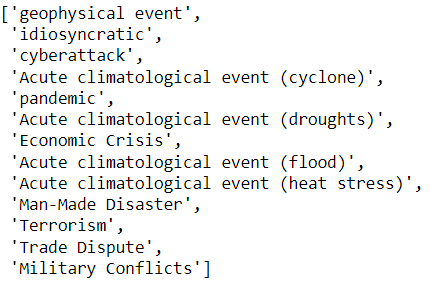

In [55]:
from newspaper import Article

article = Article('https://www.channelnewsasia.com/singapore/budget-2022-expected-deficit-3-billion-past-reserves-2506806')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array)

df = pd.DataFrame(data=probability_array * 100, index=new_category , columns=["Probability"]).sort_values(by=['Probability'], ascending=False)

df

SINGAPORE: Singapore’s Budget will continue to be expansionary for the financial year 2022, with an expected deficit of S$3 billion or 0.5 per cent of Singapore’s gross domestic product (GDP).
This is necessary to continue support for the economy, said Finance Minister Lawrence Wong on Friday (Feb 18) as he delivered the Budget 2022 statement.
Meanwhile for FY2021, the expansionary Budget is expected to clock an overall deficit of S$5 billion, or 0.9 per cent of GDP.
This, according to Mr Wong, is necessary for the country to “react nimbly and confidently to the evolving COVID-19 situation”.
President Halimah Yacob has given her in-principle support for this, Mr Wong told the House.
 
Classified Article Category: Economic Crisis


,Probability
Economic Crisis,49.187494
idiosyncratic,10.274408
Acute climatological event (droughts),8.872452
geophysical event,5.653408
Acute climatological event (heat stress),4.393560
pandemic,3.889684
Military Conflicts,3.881031
Acute climatological event (flood),3.844733
Acute climatological event (cyclone),3.488554
Trade Dispute,2.341278


In [56]:
from newspaper import Article

article = Article('https://www.channelnewsasia.com/singapore/budget-2022-560-million-household-support-package-2506476')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array)

df = pd.DataFrame(data=probability_array * 100, index=new_category , columns=["Probability"]).sort_values(by=['Probability'], ascending=False)

df



SINGAPORE: A Household Support Package worth S$560 million will be rolled out to help Singaporeans with utility bills, children’s education and daily essentials, announced Finance Minister Lawrence Wong in his Budget speech on Friday (Feb 18).
The Household Support Package includes the distribution of another set of Community Development Councils (CDC) vouchers, the doubling of GST Voucher - U-Save rebates for the rest of the year, and a top-up in the relevant education account for each child under 21.
As part of the package, another set of S$100 CDC vouchers will be distributed this year to support all Singaporean households in their daily expenses.
The nationwide scheme was launched last December with up to 1.3 million Singaporean households each receiving S$100 in digital vouchers.
Households have until the end of 2022 to claim the vouchers.
 
Classified Article Category: idiosyncratic


,Probability
idiosyncratic,19.296924
Acute climatological event (droughts),16.663835
geophysical event,10.617974
Acute climatological event (heat stress),8.251783
Military Conflicts,7.289175
Acute climatological event (flood),7.221002
Economic Crisis,7.220855
Acute climatological event (cyclone),6.552042
pandemic,4.650840
Trade Dispute,4.397282


In [57]:
from newspaper import Article

article = Article('https://www.straitstimes.com/multimedia/the-big-story-more-expensive-fish-vegetables-at-spore-wet-markets-ahead-of-cny')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array)

df = pd.DataFrame(data=probability_array * 100, index=new_category , columns=["Probability"]).sort_values(by=['Probability'], ascending=False)

df


Catch the latest news video reports on The Big Story, The Straits Times' weekday online news programme.
Prices of some popular fish, such as Chinese pomfret and red grouper, have spiked ahead of Chinese New Year.
Visiting six wet markets on Wednesday (Jan 26), ST found that some sellers are doubling their prices for these fish.
Vegetable prices also continued to creep up, as sellers said they are still coping with the aftermath of the Malaysia floods, as well as manpower shortages in farms there.
And despite bak kwa costing more as well, the higher prices have not deterred people from queuing at Lim Chee Guan's flagship store in Chinatown.
 
Classified Article Category: Acute climatological event (flood)


,Probability
Acute climatological event (flood),78.916622
idiosyncratic,4.270044
Acute climatological event (droughts),3.802574
geophysical event,2.349556
Economic Crisis,2.035799
Acute climatological event (heat stress),1.825963
Military Conflicts,1.612956
Acute climatological event (cyclone),1.449843
pandemic,1.029143
Trade Dispute,0.973035


In [58]:
from newspaper import Article

article = Article('https://www.straitstimes.com/asia/se-asia/troubling-signs-of-myanmar-food-price-rises-since-coup-un-agency')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array)

df = pd.DataFrame(data=probability_array * 100, index=new_category , columns=["Probability"]).sort_values(by=['Probability'], ascending=False)

df

YANGON (REUTERS) - The UN food agency said on Tuesday (March 16) rising food and fuel prices in Myanmar since a Feb 1 military coup risk undermining the ability of poor families to feed themselves.
The cost of fuel had risen by 15 per cent nationwide since Feb 1, raising concern about further food price increases, it said.
"These rising food and fuel prices are compounded by the near paralysis of the banking sector, slowdowns in remittances, and widespread limits on cash availability," the WFP said.
The military defended its coup saying its complaints of fraud in a November election won by Ms Suu Kyi's party had been ignored.
Myanmar, once Asia's main rice basket, was among the region's poorest countries after the military seized power in a 1962 coup and imposed an autarchic "way to socialism".
 
Classified Article Category: Military Conflicts


,Probability
Military Conflicts,58.594855
idiosyncratic,11.167074
Acute climatological event (droughts),6.616818
geophysical event,4.351171
Acute climatological event (heat stress),3.381523
Economic Crisis,3.324528
Acute climatological event (flood),2.959116
Acute climatological event (cyclone),2.684981
pandemic,1.905882
Trade Dispute,1.801976


In [59]:
from newspaper import Article

article = Article('https://www.straitstimes.com/world/europe/putin-calls-ukrainian-statehood-a-fiction-history-suggests-otherwise')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array)

df = pd.DataFrame(data=probability_array * 100, index=new_category , columns=["Probability"]).sort_values(by=['Probability'], ascending=False)

df

"Modern Ukraine was entirely and fully created by Russia, more specifically the Bolshevik, communist Russia," Mr Putin said.
As a misreading of history, it was extreme even by the standards of Mr Putin, a former KGB officer who has declared the Soviet Union's collapse the greatest geopolitical catastrophe of the 20th century.
But the happy brotherhood of nations that Mr Putin likes to paint, with Ukraine fitted snugly into the fabric of a greater Russia, is dubious.
The newly created Soviet government under Lenin that drew so much of Mr Putin's scorn on Monday would eventually crush the nascent independent Ukrainian state.
"For the past few decades, the West has been looking for fascism anywhere, but not where it was most," said Maria Tomak, an activist involved in supporting people from Crimea, a Ukrainian territory Mr Putin annexed in 2014.
 
Classified Article Category: idiosyncratic


,Probability
idiosyncratic,21.153308
Acute climatological event (droughts),15.877046
geophysical event,10.440630
Acute climatological event (heat stress),8.113960
Military Conflicts,7.167430
Acute climatological event (flood),7.100395
Economic Crisis,7.100251
Acute climatological event (cyclone),6.442609
pandemic,4.573161
Trade Dispute,4.323838


In [60]:
from newspaper import Article

article = Article('https://www.straitstimes.com/world/europe/biden-says-us-allies-will-respond-to-unjustified-attack-by-russia-on-ukraine')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array)

df = pd.DataFrame(data=probability_array * 100, index=new_category , columns=["Probability"]).sort_values(by=['Probability'], ascending=False)

df



Mr Biden is expected to announce on Thursday further measures to be imposed on Russia by America and its allies.
“President Putin has chosen a path of bloodshed and destruction by launching this unprovoked attack on Ukraine,” Mr Johnson said in a tweet.
EU chiefs Ursula von der Leyen and Charles Michel said Russia will be held “accountable” for its attack on Ukraine.
“We strongly condemn Russia’s unjustified attack on Ukraine.
In these dark hours, our thoughts are with Ukraine and the innocent women, men and children as they face this unprovoked attack and fear for their lives,” they each wrote on Twitter.
 
Classified Article Category: idiosyncratic


,Probability
idiosyncratic,15.256392
Terrorism,14.518774
Acute climatological event (droughts),12.765810
Military Conflicts,11.544859
geophysical event,8.394704
Acute climatological event (heat stress),6.523964
Acute climatological event (flood),5.709015
Economic Crisis,5.708899
Acute climatological event (cyclone),5.180127
cyberattack,5.025373


In [61]:
from newspaper import Article

article = Article('https://www.straitstimes.com/business/property/tanglin-shopping-centre-sold-to-royal-golden-eagle-for-868m-10-per-cent-above-reserve-price')


article.download()

article.parse()

article.nlp()

print(article.summary)

with open('art5.txt', 'w') as f:
    f.write(article.summary)
    
print(" ")
print("Classified Article Category: " + classify_article('art5.txt')[0])

probability_array = classify_article('art5.txt')[1]

# print(probability_array)

df = pd.DataFrame(data=probability_array * 100, index=new_category , columns=["Probability"]).sort_values(by=['Probability'], ascending=False)

df




SINGAPORE - The landmark Tanglin Shopping Centre in the Orchard Road area has been sold in a collective sale for $868 million after three failed attempts.
The buyer – a developer held by Indonesian billionaire Sukanto Tanoto’s pulp, paper and palm oil giant Royal Golden Eagle (RGE) – paid $40 million above the guide price, and about 10 per cent over its $785 million reserve price, noted marketing agent Savills Singapore.
Hoo, owns a 300 sq ft shop and an 800 sq ft office unit in the complex.
The 2011 attempt had a reserve price of $1.25 billion that was not met.
Owners of retail units ranging from 300 sq ft to 500 sq ft stand to get between $1.5 million and $3.5 million, while owners of offices between 300 sq ft and 1,500 sq ft are in line for $900,000 to $4.5 million, he added.
 
Classified Article Category: Man-Made Disaster


,Probability
Man-Made Disaster,16.641460
idiosyncratic,16.560931
Acute climatological event (droughts),13.857385
geophysical event,9.112516
Acute climatological event (heat stress),7.081813
Economic Crisis,6.585996
Military Conflicts,6.255687
Acute climatological event (flood),6.197180
Acute climatological event (cyclone),5.623068
pandemic,3.991426


# VADER Component (To be edited)

In [46]:
import pandas as pd
import re 

import nltk 
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download the lexicon
# nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

In [47]:
data = "CSV Data for Classifier/avalanche_straitstimes.csv"
sentiment_data = pd.read_csv(data)

sentiment_data = sentiment_data.drop(columns=[sentiment_data.columns[0],'location', 'news source(url)', 'keywords', 'class_name', 'new_class_name'], axis=1)
sentiment_data.head(3)

,date,news title,content summary
0,Feb-22,Himalayan avalanche kills seven Indian soldier...,MUMBAI (REUTERS) - A Himalayan avalanche kille...
1,Feb-22,Eight killed in two days after third deadly av...,ZURICH (REUTERS) - One person was killed and f...
2,Feb-22,Avalanche in Austria near Swiss border kills five,VIENNA (REUTERS) - An avalanche in an area of ...


In [48]:
sentiment_data["sentiment score"] = sentiment_data['content summary'].apply(lambda x: sent_analyzer.polarity_scores(x))
sentiment_data.head(3)

,date,news title,content summary,sentiment score
0,Feb-22,Himalayan avalanche kills seven Indian soldier...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"{'neg': 0.092, 'neu': 0.859, 'pos': 0.049, 'co..."
1,Feb-22,Eight killed in two days after third deadly av...,ZURICH (REUTERS) - One person was killed and f...,"{'neg': 0.211, 'neu': 0.723, 'pos': 0.066, 'co..."
2,Feb-22,Avalanche in Austria near Swiss border kills five,VIENNA (REUTERS) - An avalanche in an area of ...,"{'neg': 0.166, 'neu': 0.763, 'pos': 0.071, 'co..."


In [49]:
def get_compound_score(sentimentScore):
    return sentimentScore['compound']

def format_data(sentimentScore):
    
    if sentimentScore['compound'] >= 0.05:
        return 'positive'
    elif sentimentScore['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the transformation
sentiment_data["compound score"] = sentiment_data['sentiment score'].apply(lambda x: get_compound_score(x))
sentiment_data["sentiment label"] = sentiment_data['sentiment score'].apply(lambda x: format_data(x))
sentiment_data

,date,news title,content summary,sentiment score,compound score,sentiment label
0,Feb-22,Himalayan avalanche kills seven Indian soldier...,MUMBAI (REUTERS) - A Himalayan avalanche kille...,"{'neg': 0.092, 'neu': 0.859, 'pos': 0.049, 'co...",-0.7506,negative
1,Feb-22,Eight killed in two days after third deadly av...,ZURICH (REUTERS) - One person was killed and f...,"{'neg': 0.211, 'neu': 0.723, 'pos': 0.066, 'co...",-0.9712,negative
2,Feb-22,Avalanche in Austria near Swiss border kills five,VIENNA (REUTERS) - An avalanche in an area of ...,"{'neg': 0.166, 'neu': 0.763, 'pos': 0.071, 'co...",-0.9285,negative
3,Feb-22,Himalayan avalanche traps Indian Army patrol t...,NEW DELHI (REUTERS) - A Himalayan avalanche tr...,"{'neg': 0.031, 'neu': 0.851, 'pos': 0.118, 'co...",0.8225,positive
4,Feb-21,"4 skiers killed in avalanche in Utah, official...",SALT LAKE CITY (NYTIMES) - Four back-country s...,"{'neg': 0.153, 'neu': 0.824, 'pos': 0.023, 'co...",-0.9509,negative
...,...,...,...,...,...,...
511,May-15,Porters hired to deliver aid to Nepal quake vi...,KATHMANDU (AFP) - The United Nations World Foo...,"{'neg': 0.119, 'neu': 0.804, 'pos': 0.078, 'co...",-0.6249,negative
512,May-15,Nepal river blocked by landslide flowing again...,KATHMANDU (Reuters) - A river dammed up by a h...,"{'neg': 0.096, 'neu': 0.858, 'pos': 0.046, 'co...",-0.7650,negative
513,Apr-15,Nepal earthquake: Teen pulled from Nepal quake...,"KATHMANDU (REUTERS, AFP) - Rescuers pulled a 1...","{'neg': 0.162, 'neu': 0.679, 'pos': 0.159, 'co...",-0.3400,negative
514,Apr-15,Nepal earthquake: Survivor found after 80-hour...,Thousands were killed when the earthquake brou...,"{'neg': 0.094, 'neu': 0.848, 'pos': 0.057, 'co...",-0.6249,negative
